# 로지스틱 회귀(Logistic Regression) - Sigmoid function을 사용
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 데이터가 어떤 범주에 속할 확률을 0~1 사이의 값으로 예측, 결과 값이 0과 1일때 가까운 쪽 혹은 확률을 출력 가능
- 로지스틱 회귀의 식은 {y = mx + b}  ->  P = 1 / (1 + e^-y) 가 된다 그러므로 P = 1 / (1 + e^-(mx + b)) 로 표현 가능

### 공부 시간에 따른 자격증 시험 합격 가능성

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 데이터 분리

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 학습 (로지스틱 회귀 모델)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### 6시간 공부했을 때 예측

In [10]:
classifier.predict([[6]]) # 6시간 공부했을때 합격이라고 예측

array([1], dtype=int64)

In [11]:
classifier.predict_proba([[6]]) # 6시간 공부했을 때 불합격 확률, 합격 확률 출력
# 합격 확률 : 14%, 불합격 확률 : 86%

array([[0.141483, 0.858517]])

### 4시간 공부했을 때 예측

In [13]:
classifier.predict([[4]]) # 4시간 공부했을때 불합격이라고 예측

array([0], dtype=int64)

In [14]:
classifier.predict_proba([[4]]) # 4시간 공부했을 때 불합격 확률, 합격 확률 출력
# 합격 확률 : 62%, 불합격 확률 : 38%

array([[0.62497682, 0.37502318]])

### 분류 결과 예측 (테스트 세트)

In [16]:
y_pred = classifier.predict(X_test)
y_pred # 테스트 세트의 예측 값

array([1, 0, 1, 1], dtype=int64)

In [17]:
y_test # 테스트 세트의 실제 값

array([1, 0, 1, 0], dtype=int64)

In [18]:
X_test # 테스트 세트의 공부 시간

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [19]:
classifier.score(X_test, y_test) # 모델 평가
# 전체 테스트 세트에서 분류 예측으로 맞힌 비율

0.75

### 데이터 시각화 (훈련 세트)

In [21]:
X_range = np.arange(np.min(X), np.max(X), 0.1) # X의 최소값에서 최대값 까지를 0.1로 잘라서 데이터 생성
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [22]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_))) # y = mx + b
p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [23]:
p.shape

(1, 95)

In [24]:
X_range.shape

(95,)

In [25]:
p = p.reshape(-1) # len(p)를 대신 넣어도 됨 -> -1만 넣으면 저절로 1차원 배열로 reshape된다
p.shape

(95,)

In [26]:
X_train.shape, y_train.shape # X_range와 p에서는 배열구조를 똑같이 맞춰야하고 X_train, y_train은 다른 이유?
                             # (16, 1)과 (16, )를 출력해보니 2차원 배열과 1차원 배열이였는데 이 둘은 괜찮은건지?

((16, 1), (16,))

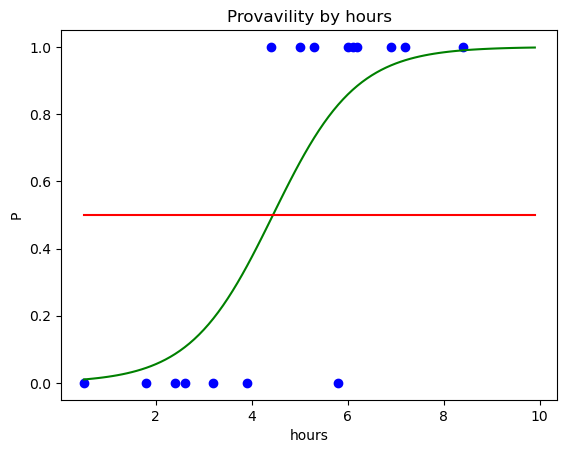

In [27]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기
plt.title('Provavility by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 데이터 시각화 (테스트 세트)

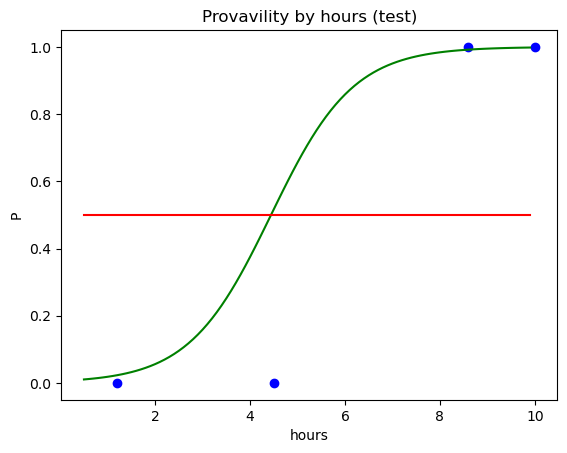

In [29]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만기기
plt.title('Provavility by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [30]:
classifier.predict_proba([[4.5]]) # 4.5시간 공부했을때 확률 (예측값 합격, 실제값 불합격)
# 불합격 확률 : 48%, 합격 확률 : 52%

array([[0.48307854, 0.51692146]])

### 혼동 행렬 (Confusion Matrix)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
# [예측값과 실제값이 둘다 불합격(True Negative), 예측값은 합격이고 실제값은 불합격(False Positive)]
# [예측값은 불합격이고 실제값은 합격(False Negative), 예측값과 실제값이 둘다 합격(True Positive)]

# True는 예측값과 실제값이 같은 것, False는 예측값과 실제값이 다른 것
# Negative는 예측값이 불합격인 것, positive는 예측값이 합격인 것

array([[1, 1],
       [0, 2]], dtype=int64)